# Health Insurance Cost Analysis

# Dataset Information

## Context
**Machine Learning with R** by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account. This can be problematic if you are checking the book out from the library or borrowing it from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

## Content
### Columns
- **age**: Age of primary beneficiary
- **sex**: Insurance contractor gender (female, male)
- **bmi**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking status (smoker, non-smoker)
- **region**: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest)
- **charges**: Individual medical costs billed by health insurance


#### Importing necessary libraries for data analysis

In [37]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

# Optional: Configure the visual style of plots
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Ensure plots are displayed within the Jupyter Notebook
%matplotlib inline

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


#### Load the dataset

In [2]:
file_path = "C:\\Users\\Praful Bhoyar\\Python scripts\\Data Analytics Projects\\Project 1\\insurance.csv"
insurance_data = pd.read_csv(file_path)

# Display the first 5 observations
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Display the last 5 observations
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
# Get the shape of the dataframe
insurance_data.shape

(1338, 7)

##### Dataset Shape

The shape of the dataset is `(1338, 7)`, which means:

- **1338 rows**: There are 1338 individual records or observations in the dataset. Each row corresponds to a separate entry, such as a policyholder's information.
- **7 columns**: The dataset includes 7 attributes or features for each observation. These columns represent different characteristics, including age, sex, BMI, number of children, smoking status, region, and charges.

In summary, the dataset contains 1338 records with 7 distinct attributes, providing a solid foundation for performing various analyses and modeling tasks.


In [5]:
# Display information about the dataframe
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Dataset Information

The dataset is a pandas DataFrame with the following characteristics:

- **Type**: `<class 'pandas.core.frame.DataFrame'>`
- **Number of Entries**: 1338
- **RangeIndex**: From 0 to 1337


### Data Types

- **float64**: 2 columns (bmi, charges)
- **int64**: 2 columns (age, children)
- **object**: 3 columns (sex, smoker, region)

### Memory Usage

The dataset uses approximately 73.3 KB of memory.

### Inference

- **Complete Data**: All columns contain 1338 non-null entries, indicating no missing values.
- **Data Types**: The dataset includes numerical columns (`int64` and `float64`) and categorical columns (`object`). This variety allows for a range of analyses and modeling techniques.
- **Memory**: The dataset is relatively small in size, making it efficient to process and analyze.


In [6]:
# Get the statistical summary of the dataframe
insurance_data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# Create a new dataframe with only the numerical columns
numerical_data = insurance_data.select_dtypes(include=[np.number])

# Calculate the mean and 50th percentile (median) for the numerical columns
mean_values = numerical_data.mean()
median_values = numerical_data.median()

# Compute the difference between the mean and median
difference = mean_values - median_values

# Display the differences
difference


age            0.207025
bmi            0.263397
children       0.094918
charges     3888.389265
dtype: float64

### Difference Between Mean and 50th Percentile for Numerical Columns

A new dataframe was created containing only the numerical columns from the original dataset. The differences between the mean and 50th percentile (median) for these columns are as follows:


### Inference

- **Age**: The difference between the mean and median is 0.21, which is less than 5. Therefore, there is no indication of outliers in the age column.
- **BMI**: The difference between the mean and median is 0.26, which is less than 5. Therefore, there is no indication of outliers in the BMI column.
- **Children**: The difference between the mean and median is 0.09, which is less than 5. Therefore, there is no indication of outliers in the children column.
- **Charges**: The difference between the mean and median is 3888.39, which is greater than 5. This suggests that there are significant outliers present in the charges column, likely causing the high mean value compared to the median.

## Statistical Summary and Inference

The following table provides a statistical summary of the numerical columns in the dataset:


### Inference

- **Age**:
  - The mean age (39.21) is slightly higher than the median age (39.00), with a small difference of 0.21 years. This suggests a minor positive skew in the age distribution.
  - The standard deviation is 14.05, indicating variability in the age of the beneficiaries.

- **BMI**:
  - The mean BMI (30.66) is slightly higher than the median BMI (30.40), with a difference of 0.26. This indicates a slight positive skew in the BMI distribution.
  - The standard deviation is 6.10, showing variability in body mass index values.

- **Children**:
  - The mean number of children (1.09) is slightly higher than the median (1.00), with a difference of 0.09. This reflects a slight positive skew in the number of children.
  - The standard deviation is 1.21, indicating variability in the number of children covered by insurance.

- **Charges**:
  - The mean medical charges ($13,270.42) are significantly higher than the median ($9,382.03), with a difference of $3,888.39. This substantial difference indicates the presence of outliers and a strong positive skew in the charges distribution.
  - The standard deviation is very high at $12,110.01, further suggesting considerable variability and the influence of extreme values on the mean.



### Data Preprocessing


#### Data Cleaning


In [8]:
# Rename columns for clarity
insurance_data.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'bmi': 'BMI',
    'children': 'Number_of_Children',
    'smoker': 'Smoker',
    'region': 'Region',
    'charges': 'Medical_Charges'
}, inplace=True)

# Display the first 5 rows to confirm renaming
insurance_data.head()

,Age,Gender,BMI,Number_of_Children,Smoker,Region,Medical_Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Round numerical columns to 2 decimal places
insurance_data[['BMI', 'Medical_Charges']] = insurance_data[['BMI', 'Medical_Charges']].round(2)

In [10]:
insurance_data.head()

,Age,Gender,BMI,Number_of_Children,Smoker,Region,Medical_Charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


#### Rounding Numerical Values

To ensure consistency and readability, numerical columns with more than 4 decimal places have been rounded to 2 decimal places. Specifically:

- **BMI**
- **Medical_Charges**

This adjustment helps in presenting the data more clearly and uniformly.


### Null Value Handling


In [11]:
# Find the number of missing values in each column
missing_values = insurance_data.isnull().sum()

# Create a dataframe to display missing values
missing_values_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Values': missing_values.values
})

# Display the dataframe
missing_values_df


,Column,Missing_Values
0,Age,0
1,Gender,0
2,BMI,0
3,Number_of_Children,0
4,Smoker,0
5,Region,0
6,Medical_Charges,0


In [12]:
# Calculate the percentage of missing values for each column
missing_values_df['Percentage'] = (missing_values_df['Missing_Values'] / len(insurance_data)) * 100

# Display the updated dataframe
missing_values_df


,Column,Missing_Values,Percentage
0,Age,0,0.0
1,Gender,0,0.0
2,BMI,0,0.0
3,Number_of_Children,0,0.0
4,Smoker,0,0.0
5,Region,0,0.0
6,Medical_Charges,0,0.0


### Null Value Handling

#### Missing Values Summary

All columns in the dataset have no missing values, indicating that the dataset is complete.


###  Outliers Treatment


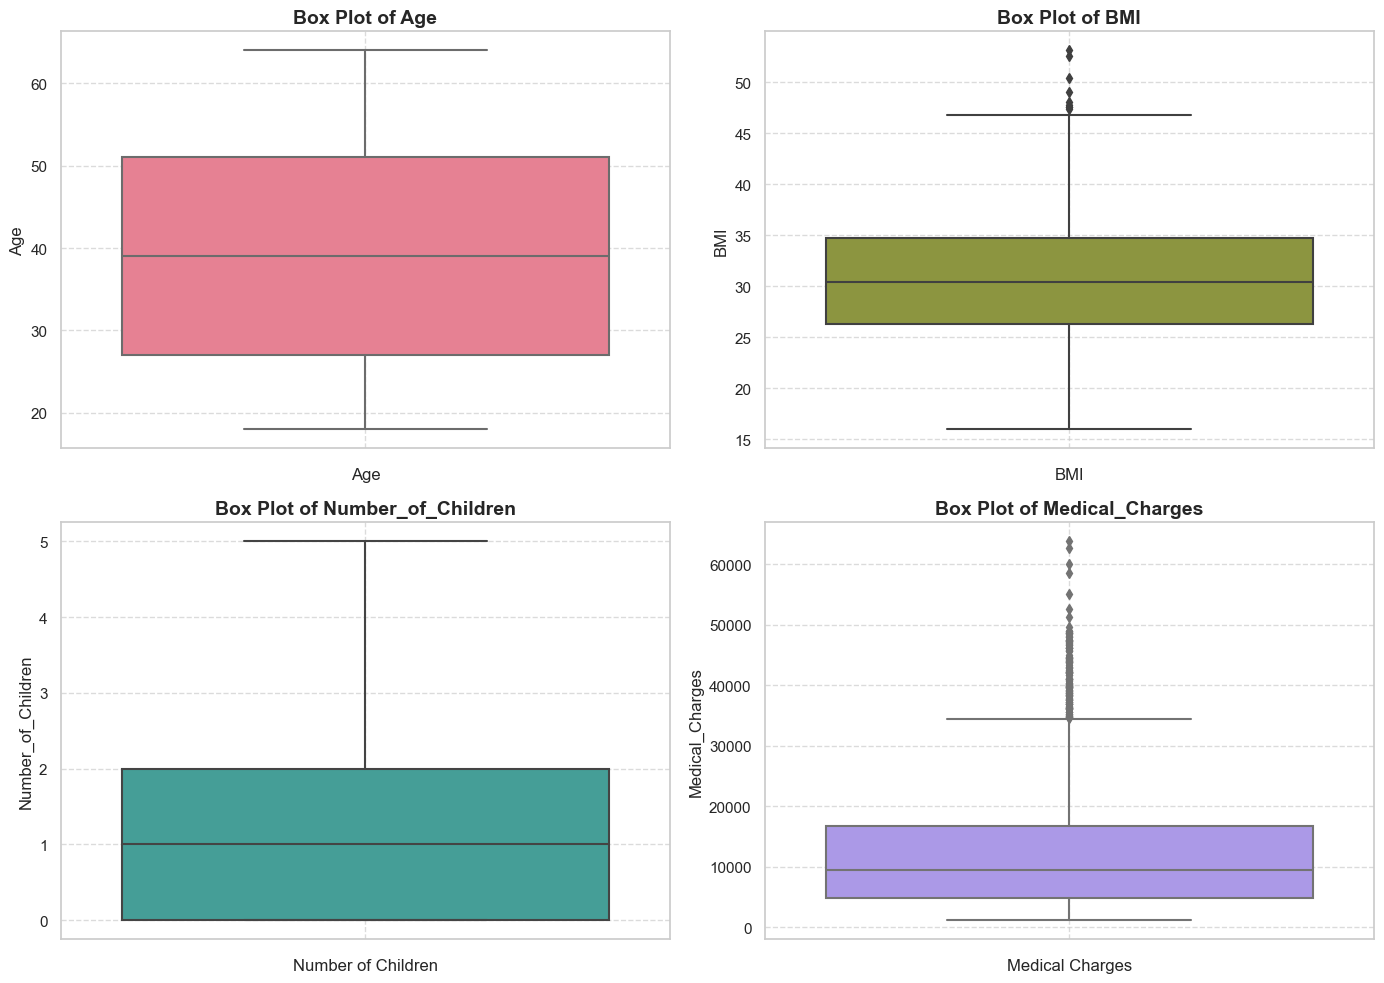

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define a color palette
palette = sns.color_palette("husl", 4)

# Create a figure for the box plots
plt.figure(figsize=(14, 10))

# Box plot for Age
plt.subplot(2, 2, 1)
sns.boxplot(y=insurance_data['Age'], color=palette[0])
plt.title('Box Plot of Age', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=insurance_data['BMI'], color=palette[1])
plt.title('Box Plot of BMI', fontsize=14, weight='bold')
plt.xlabel('BMI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Number_of_Children
plt.subplot(2, 2, 3)
sns.boxplot(y=insurance_data['Number_of_Children'], color=palette[2])
plt.title('Box Plot of Number_of_Children', fontsize=14, weight='bold')
plt.xlabel('Number of Children', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Medical_Charges
plt.subplot(2, 2, 4)
sns.boxplot(y=insurance_data['Medical_Charges'], color=palette[3])
plt.title('Box Plot of Medical_Charges', fontsize=14, weight='bold')
plt.xlabel('Medical Charges', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Outliers Treatment

#### Outliers Inference

From the box plots, it is observed that outliers are present in the following columns:

- **Medical_Charges**: The `Medical_Charges` column displays a significant number of outliers, as indicated by the spread and distance of points from the interquartile range (IQR). These outliers represent unusually high medical expenses that are far from the typical range of charges.

- **BMI**: The `BMI` column also shows outliers, although less extreme compared to `Medical_Charges`. The outliers in this column indicate individuals with BMI values that are either significantly lower or higher than the majority of the dataset.

The presence of outliers in these columns suggests that there are data points that deviate significantly from the norm. These outliers could be due to errors in data entry, unique cases, or genuine variations. Further investigation might be needed to determine the cause and decide whether to retain, remove, or adjust these outliers.


In [14]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to the relevant columns
cleaned_data = insurance_data.copy()  # Create a copy to avoid modifying the original data

# Removing outliers for Medical_Charges
cleaned_data = remove_outliers_iqr(cleaned_data, 'Medical_Charges')

# Removing outliers for BMI
cleaned_data = remove_outliers_iqr(cleaned_data, 'BMI')

# Display the shape of the dataframe before and after outlier removal
original_shape = insurance_data.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape


((1338, 7), (1186, 7))

### Outliers Treatment

#### Outliers Treatment Using IQR Method

To address the outliers identified in the `Medical_Charges` and `BMI` columns, we employed the Interquartile Range (IQR) method. Here’s the procedure:

1. **Calculated the IQR** for each column:
   - **Medical_Charges**: The range between the 25th percentile (Q1) and the 75th percentile (Q3).
   - **BMI**: The range between the 25th percentile (Q1) and the 75th percentile (Q3).

2. **Defined the Outlier Bounds**:
   - Lower Bound: \( Q1 - 1.5 \times IQR \)
   - Upper Bound: \( Q3 + 1.5 \times IQR \)

3. **Filtered the Data**:
   - Removed rows where the values in `Medical_Charges` and `BMI` fell outside these bounds.

After applying this treatment, the dataset’s number of rows decreased, indicating the removal of outliers. The exact number of rows before and after outlier removal can be compared to assess the extent of data reduction.


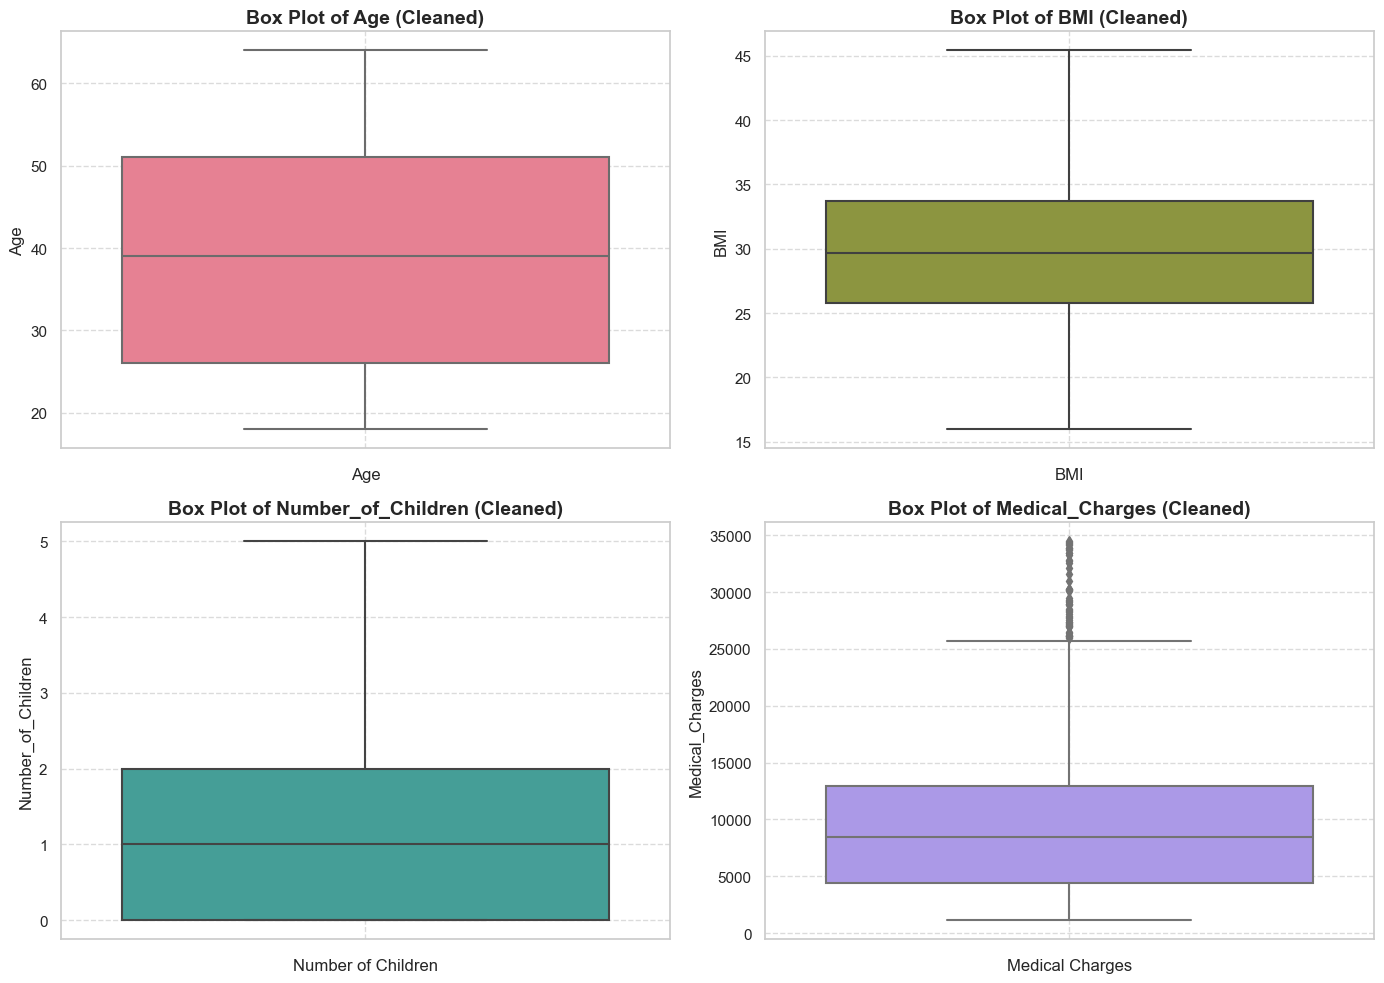

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define a color palette for the plots
palette = sns.color_palette("husl", 4)

# Create a figure for the box plots
plt.figure(figsize=(14, 10))

# Box plot for Age
plt.subplot(2, 2, 1)
sns.boxplot(y=cleaned_data['Age'], color=palette[0])
plt.title('Box Plot of Age (Cleaned)', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=cleaned_data['BMI'], color=palette[1])
plt.title('Box Plot of BMI (Cleaned)', fontsize=14, weight='bold')
plt.xlabel('BMI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Number_of_Children
plt.subplot(2, 2, 3)
sns.boxplot(y=cleaned_data['Number_of_Children'], color=palette[2])
plt.title('Box Plot of Number_of_Children (Cleaned)', fontsize=14, weight='bold')
plt.xlabel('Number of Children', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Medical_Charges
plt.subplot(2, 2, 4)
sns.boxplot(y=cleaned_data['Medical_Charges'], color=palette[3])
plt.title('Box Plot of Medical_Charges (Cleaned)', fontsize=14, weight='bold')
plt.xlabel('Medical Charges', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Method 2: Replace outliers with mean of that column

In [16]:
import pandas as pd
import numpy as np

# Define a function to replace outliers with the mean using the IQR method
def replace_outliers_with_mean(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the mean of the column
    mean_value = df[column_name].mean()
    
    # Replace outliers with the mean value
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), mean_value, df[column_name])
    
    return df

# Create a copy of the dataframe to avoid modifying the original data
cleaned_data2 = insurance_data.copy()

# Replace outliers with the mean for the relevant columns
cleaned_data2 = replace_outliers_with_mean(cleaned_data2, 'Medical_Charges')
cleaned_data2 = replace_outliers_with_mean(cleaned_data2, 'BMI')

# Display the shape of the dataframe after outlier treatment
original_shape = insurance_data.shape
cleaned_shape2 = cleaned_data2.shape

original_shape, cleaned_shape2


((1338, 7), (1338, 7))

#### Outliers Replacement Using Mean

To handle the outliers identified in the `Medical_Charges` and `BMI` columns, we replaced them with the mean of their respective columns. Here’s the updated approach:

1. **Calculated the Mean** for each column:
   - The mean value was used to replace outliers in the `Medical_Charges` and `BMI` columns.

2. **Replaced Outliers**:
   - Outliers were identified using the IQR method and replaced with the column mean.

3. **Visualized the Data**:
   - The box plots below show the distributions of the columns after outliers have been replaced with the mean.

The updated box plots indicate a more stable distribution of data in the `Medical_Charges` and `BMI` columns, with previously extreme values now aligned with the mean. This approach helps in reducing the influence of outliers while retaining the dataset's size.

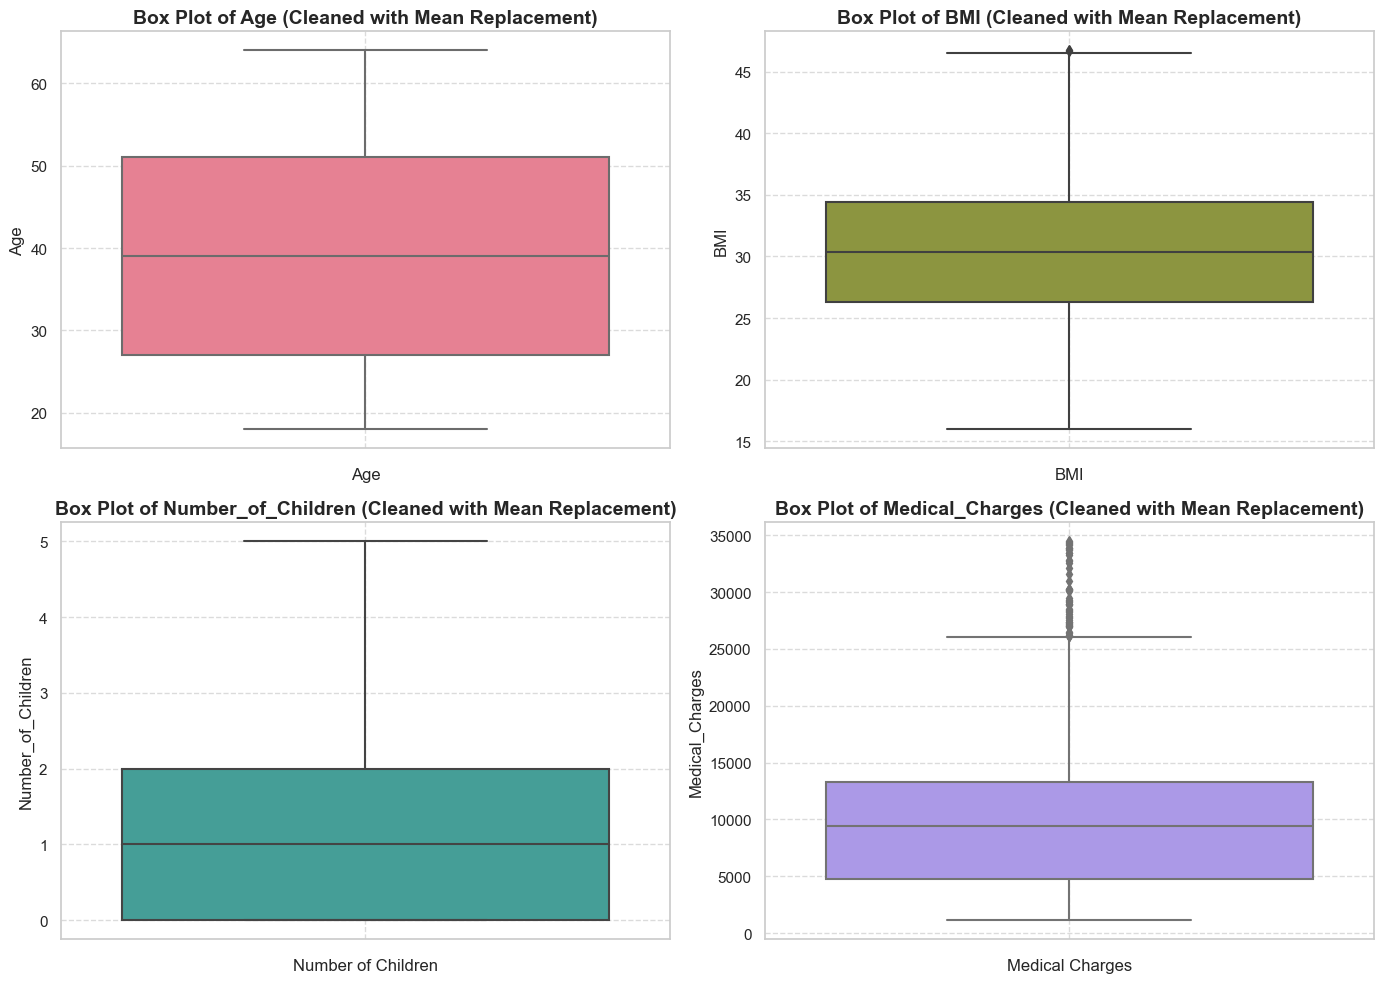

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define a color palette for the plots
palette = sns.color_palette("husl", 4)

# Create a figure for the box plots
plt.figure(figsize=(14, 10))

# Box plot for Age
plt.subplot(2, 2, 1)
sns.boxplot(y=cleaned_data2['Age'], color=palette[0])
plt.title('Box Plot of Age (Cleaned with Mean Replacement)', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for BMI
plt.subplot(2, 2, 2)
sns.boxplot(y=cleaned_data2['BMI'], color=palette[1])
plt.title('Box Plot of BMI (Cleaned with Mean Replacement)', fontsize=14, weight='bold')
plt.xlabel('BMI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Number_of_Children
plt.subplot(2, 2, 3)
sns.boxplot(y=cleaned_data2['Number_of_Children'], color=palette[2])
plt.title('Box Plot of Number_of_Children (Cleaned with Mean Replacement)', fontsize=14, weight='bold')
plt.xlabel('Number of Children', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot for Medical_Charges
plt.subplot(2, 2, 4)
sns.boxplot(y=cleaned_data2['Medical_Charges'], color=palette[3])
plt.title('Box Plot of Medical_Charges (Cleaned with Mean Replacement)', fontsize=14, weight='bold')
plt.xlabel('Medical Charges', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Exploratory Data Analysis (EDA)


#### Introduction

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing and visualizing the main characteristics of the data, often with the help of statistical graphics and other data visualization tools. EDA helps in understanding the data's underlying patterns, spotting anomalies, testing assumptions, and checking the data quality before moving on to more complex modeling.

#### Importance in This Scenario

In this project, EDA will help in the following ways:

1. **Understand Data Distribution**: By visualizing the distributions of numerical features such as `Age`, `BMI`, and `Medical Charges`, EDA helps in understanding the spread and central tendencies of these variables. It will reveal if there are any skewed distributions or outliers that need addressing.

2. **Identify Outliers**: EDA techniques, like box plots, are used to identify outliers in the data. In our case, identifying and treating outliers in columns like `Medical Charges` and `BMI` helps in reducing their impact on the analysis and ensures more accurate modeling.

3. **Assess Data Quality**: Checking for missing values and anomalies allows us to clean the data effectively. This ensures that the dataset is reliable and ready for further analysis or modeling.

4. **Feature Relationships**: EDA will help in exploring relationships between different features, such as how `Age` might influence `Medical Charges`. This understanding can guide feature engineering and selection in predictive modeling.

5. **Prepare for Modeling**: Understanding the data through EDA informs how to preprocess the data for machine learning models, such as normalizing data or encoding categorical variables.

Overall, EDA provides a comprehensive view of the data, making it easier to prepare and process for more advanced analytical techniques and ensuring that insights derived are robust and reliable.

### Univariate Analysis



#### Numerical Columns

- **Histogram**: 
  - **Purpose**: Understand the distribution of a numerical variable.
  - **Use Case**: Distribution of `Age`, `BMI`, or `Medical Charges`.

- **Box Plot**: 
  - **Purpose**: Highlight the median, quartiles, and potential outliers.
  - **Use Case**: Box plot for `Age` or `Medical Charges`.

- **Density Plot**: 
  - **Purpose**: Show the probability density of a numerical variable with a smooth curve.
  - **Use Case**: Density plot for `BMI`.

- **Violin Plot**: 
  - **Purpose**: Combine aspects of box plots and density plots to show distribution and density.
  - **Use Case**: Violin plot for `Medical Charges`.

- **Summary Statistics Table**: 
  - **Purpose**: Provide measures such as mean, median, standard deviation, minimum, and maximum.
  - **Use Case**: Summary statistics for `BMI` or `Age`.

#### Categorical Columns

- **Bar Plot**: 
  - **Purpose**: Show the count or proportion of each category.
  - **Use Case**: Distribution of `Sex`, `Smoker`, or `Region`.

- **Pie Chart**: 
  - **Purpose**: Represent the proportion of each category as a slice of a pie.
  - **Use Case**: Pie chart for `Region` to show percentage distribution.

- **Count Plot**: 
  - **Purpose**: Count occurrences of categories in a categorical column.
  - **Use Case**: Count plot for `Children`.

- **Summary Statistics Table**: 
  - **Purpose**: Include counts and percentages of each category.
  - **Use Case**: Table showing counts and percentages for `Sex` and `Smoker`.


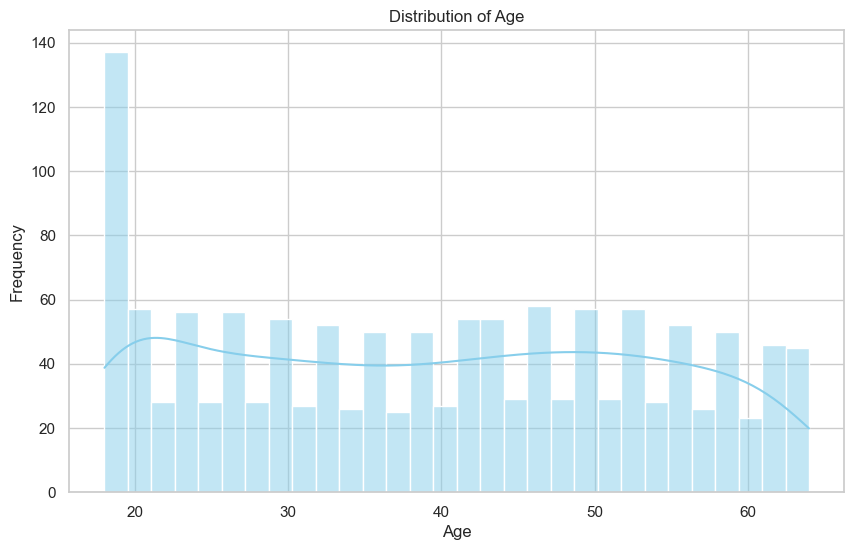

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data2, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Description**: The histogram shows the distribution of ages with a superimposed density curve.

**Interpretation**:
- The highest frequency is observed at age 18, indicating a significant number of individuals in this age group.
- The distribution is relatively uniform between ages 20 and 60, with frequencies ranging between 30 to 50.
- There is a slight dip in frequency around the late 20s and early 30s, followed by a small rise towards the 50s.


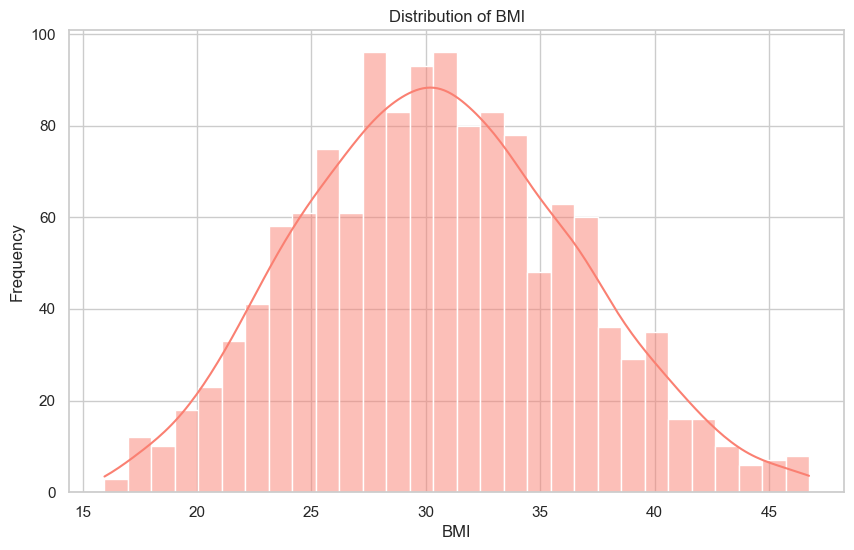

In [19]:
# Histogram for BMI
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data2, x='BMI', bins=30, kde=True, color='salmon')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Description**: The histogram shows the distribution of Body Mass Index (BMI) values with a density curve.

**Interpretation**:
- The distribution is roughly bell-shaped, indicating a normal distribution of BMI values.
- The majority of individuals have a BMI between 25 and 35, with the peak around 30.
- Few individuals have BMI values below 20 or above 40, showing a concentration around the average BMI range.


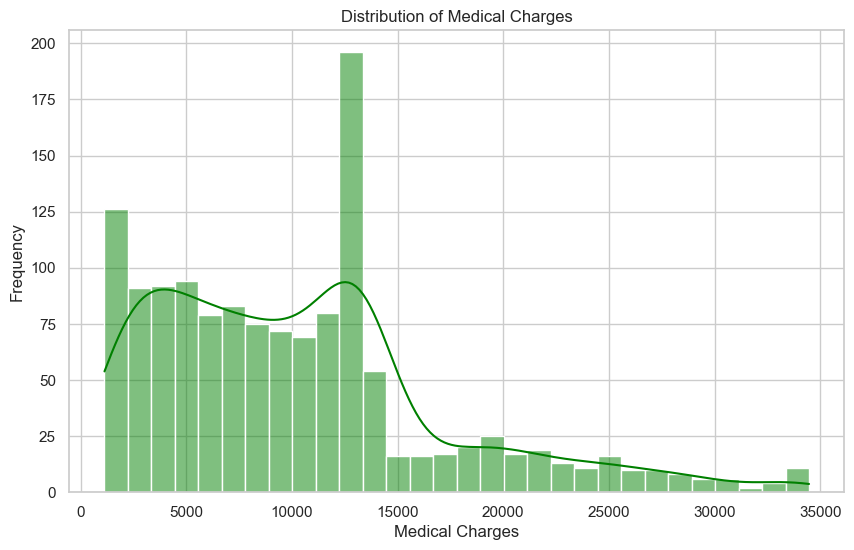

In [20]:
# Histogram for Medical Charges
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data2, x='Medical_Charges', bins=30, kde=True, color='green')
plt.title('Distribution of Medical Charges')
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Description**: The histogram shows the distribution of medical charges with a density curve.

**Interpretation**:
- The distribution is right-skewed, indicating that most individuals have lower medical charges.
- A significant number of individuals have medical charges around $10,000 to $15,000.
- There is a long tail extending towards higher medical charges, with fewer individuals having extremely high charges above $25,000.


In [21]:
cleaned_data2.columns

Index(['Age', 'Gender', 'BMI', 'Number_of_Children', 'Smoker', 'Region',
       'Medical_Charges'],
      dtype='object')

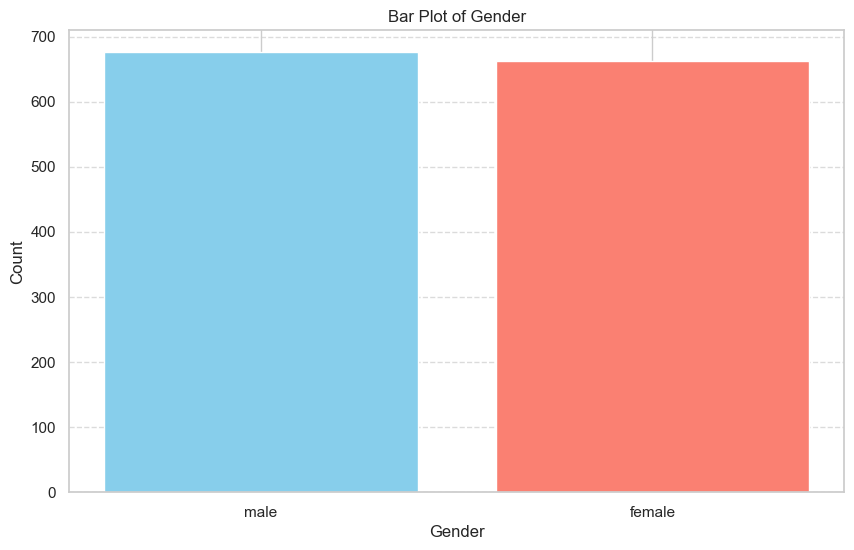

In [22]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Sex' column
sex_counts = cleaned_data2['Gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'salmon'])
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Description**: The bar plot shows the count of individuals by gender.

**Interpretation**:
- The counts for male and female individuals are nearly equal, with a slightly higher count for females.
- This suggests a balanced gender distribution in the dataset.


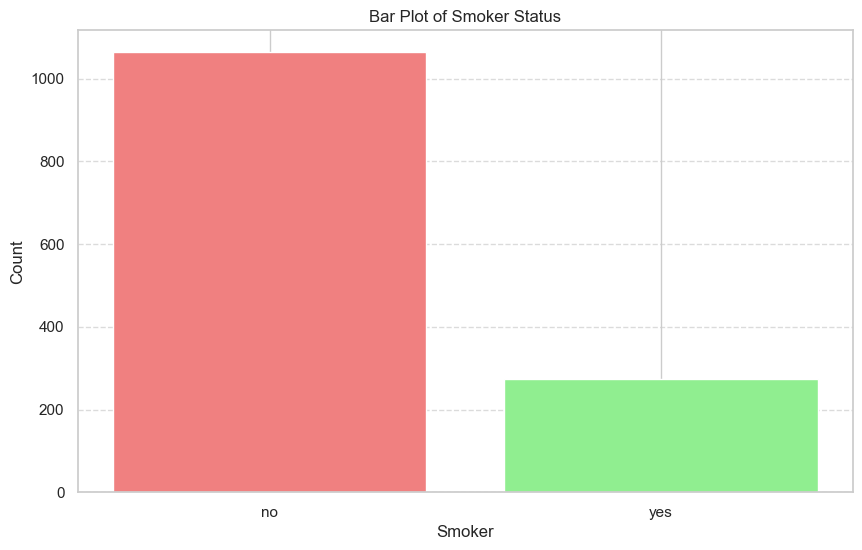

In [23]:
# Count the occurrences of each category in the 'Smoker' column
smoker_counts = cleaned_data2['Smoker'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(smoker_counts.index, smoker_counts.values, color=['lightcoral', 'lightgreen'])
plt.title('Bar Plot of Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Interpretation

**Smoking Prevalence**: Based on this visualization, it can be inferred that smoking is less prevalent in the studied population.

**Further Analysis**: Further analysis would be required to understand the reasons behind this disparity, such as age group, gender, geographical location, etc.


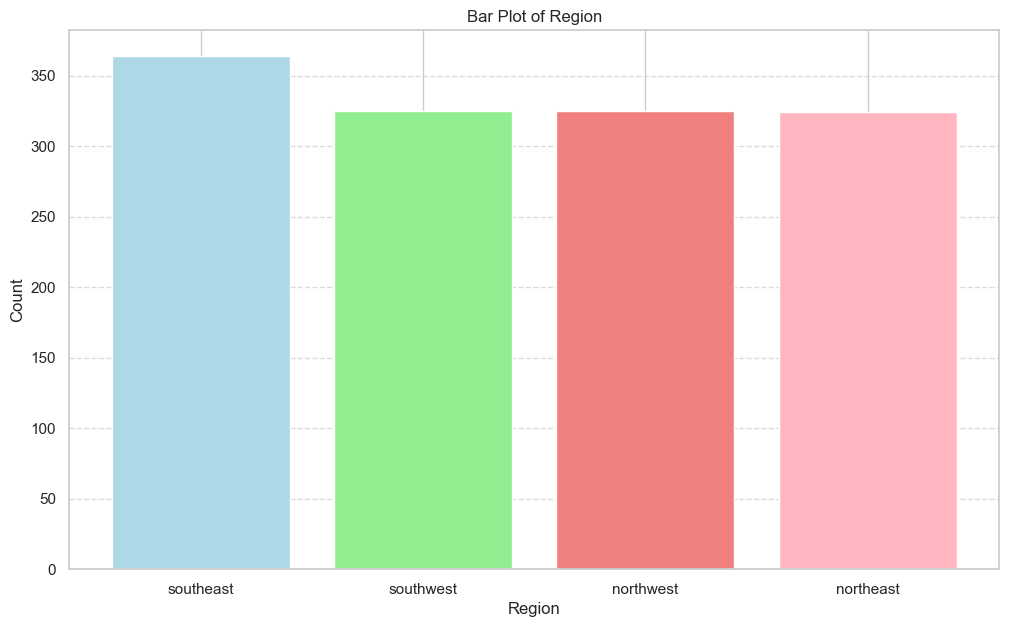

In [24]:
# Count the occurrences of each category in the 'Region' column
region_counts = cleaned_data2['Region'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 7))
plt.bar(region_counts.index, region_counts.values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('Bar Plot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Interpretation

**Distribution of Regions**: The plot illustrates the distribution of individuals across different regions.

**Dominant Region**: The "southeast" region has the highest count, suggesting it is the most represented region in the dataset.

**Regional Variation**: The count varies across regions, with "southwest" having the second-highest count, followed by "northwest" and "northeast."

**Data Imbalance**: There might be a potential data imbalance, as the counts for "southwest," "northwest," and "northeast" are relatively lower compared to "southeast."


### Bivariate Analysis


In [26]:
# Select only numerical columns
numerical_df = cleaned_data2.select_dtypes(include=['float64', 'int64'])

# Display the first few rows to verify
numerical_df.head()

,Age,BMI,Number_of_Children,Medical_Charges
0,19,27.90,0,16884.92
1,18,33.77,1,1725.55
2,28,33.00,3,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86


In [28]:
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
correlation_matrix


,Age,BMI,Number_of_Children,Medical_Charges
Age,1.000000,0.114291,0.042469,0.416964
BMI,0.114291,1.000000,0.017314,-0.017523
Number_of_Children,0.042469,0.017314,1.000000,0.082784
Medical_Charges,0.416964,-0.017523,0.082784,1.000000


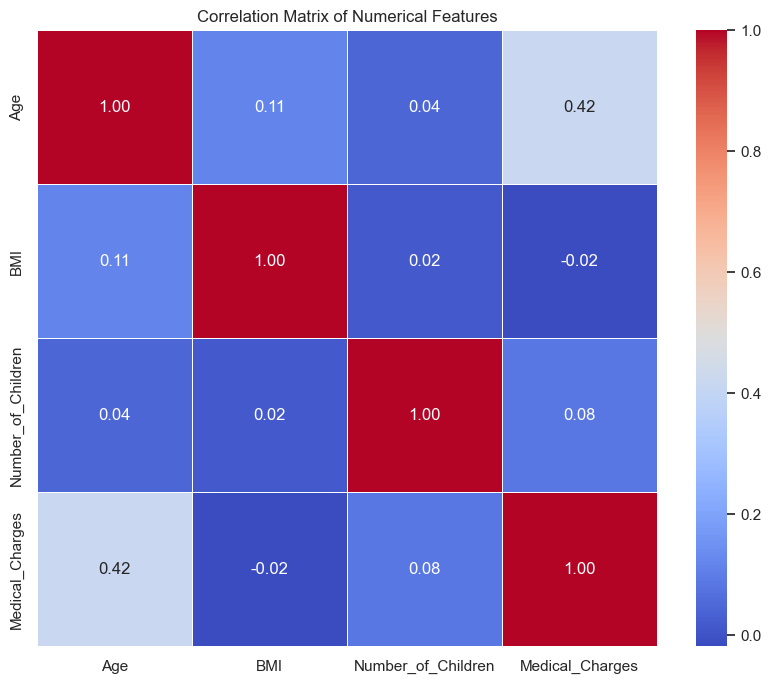

In [29]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### Interpretation of Correlation

- **Age and Medical Charges**: The correlation of **0.417** indicates a moderate positive relationship. This suggests that as the age of individuals increases, their medical charges also tend to increase.

- **BMI and Medical Charges**: The correlation of **-0.018** shows a negligible negative relationship, implying that BMI has little to no effect on medical charges.

- **Age and BMI**: The correlation of **0.114** indicates a weak positive relationship, suggesting that age has a slight influence on BMI.

- **Number of Children and Medical Charges**: The correlation of **0.083** indicates a weak positive relationship, meaning the number of children has a minimal effect on medical charges.

- **Age and Number of Children**: The correlation of **0.042** suggests a very weak positive relationship, indicating little to no relationship between age and the number of children.

#### Rules for Visualization

- **Pairs with a correlation greater than 0.3** or less than **-0.3** are selected for bivariate analysis.

#### Selected Pairs for Bivariate Analysis

- **Age and Medical Charges** (correlation = 0.417) meets the criterion and will be selected for further visualization and analysis.


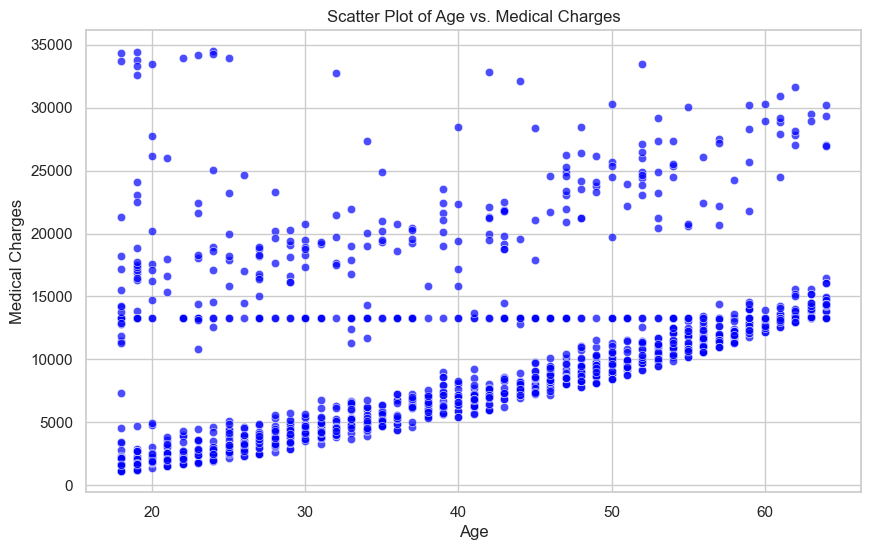

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data2, x='Age', y='Medical_Charges', color='blue', alpha=0.7)
plt.title('Scatter Plot of Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.grid(True)
plt.show()


### Interpretation

**Positive Correlation**: There is a positive relationship between age and medical charges. This means that as age increases, medical charges tend to increase as well.

**Scatter in Data**: The relationship between age and medical charges is not perfectly linear. There is significant scatter in the data points, suggesting that factors other than age influence medical charges.

**Other Factors**: To gain a more comprehensive understanding of medical charges, it is necessary to consider additional factors beyond age that might contribute to the variation in costs.


###  Categorical and Numerical Analysis

#### Possible Plots

1. **Box Plot**
   - **Description**: Shows the distribution of a numerical variable across different categories.
   - **Use Case**: Compare distribution and identify outliers.
   - **Example**: Medical Charges by Gender.

2. **Violin Plot**
   - **Description**: Combines box plot with KDE plot for distribution and density.
   - **Use Case**: Visualize distribution and density.
   - **Example**: Medical Charges by Region.

3. **Bar Plot**
   - **Description**: Displays mean or other statistics of the numerical variable for each category.
   - **Use Case**: Compare averages across categories.
   - **Example**: Medical Charges by Smoking Status.

4. **Strip Plot**
   - **Description**: Shows individual data points for the numerical variable across categories.
   - **Use Case**: Visualize distribution of data points.
   - **Example**: Medical Charges by Region.


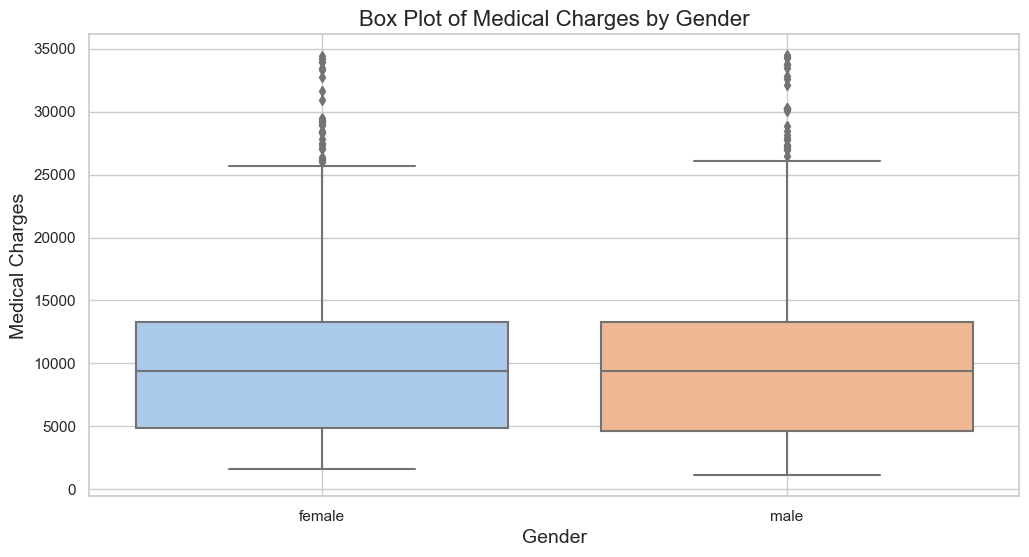

In [32]:
# Box Plot of Medical Charges by Gender
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'pastel'

# Creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data2, x='Gender', y='Medical_Charges', palette=palette)
plt.title('Box Plot of Medical Charges by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)
plt.grid(True)
plt.show()

**Median Medical Charges**: On average, females tend to have slightly higher medical charges compared to males.

**Distribution**: The distribution of medical charges for both genders is skewed to the right, indicating the presence of outliers with significantly higher charges.

**Variation**: There is a wider range of medical charges among females compared to males, as indicated by the larger box and whiskers for the female group.

**Outliers**: Both genders exhibit a considerable number of outliers, suggesting the presence of extreme values in medical charges for a subset of individuals.

**Potential Gender Disparity**: While the median suggests a slight difference in charges, further analysis is needed to determine if there is a statistically significant difference between genders.


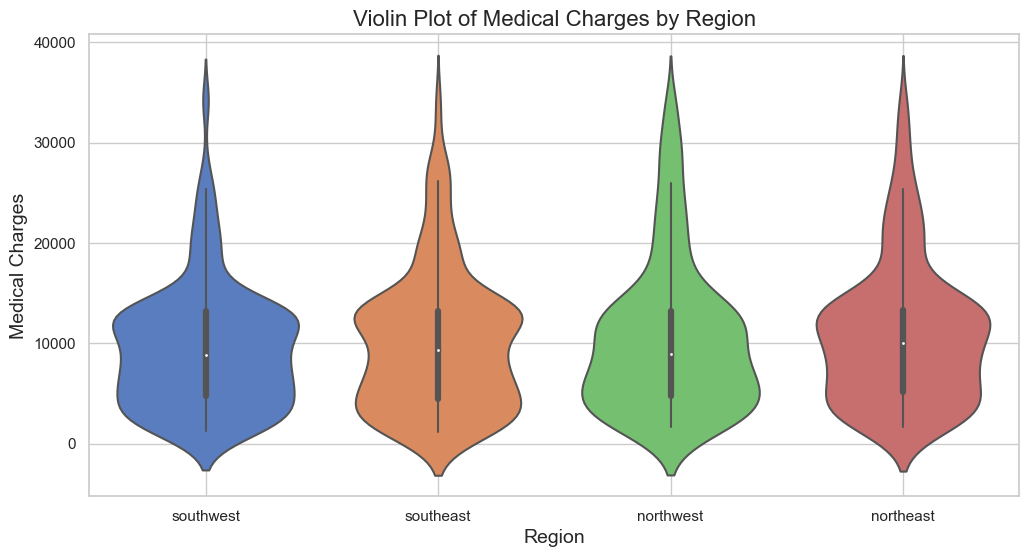

In [33]:
# Violin Plot of Medical Charges by Region
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'muted'

# Creating the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data2, x='Region', y='Medical_Charges', palette=palette)
plt.title('Violin Plot of Medical Charges by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)
plt.grid(True)
plt.show()

**Distribution Variation**: The distribution of medical charges differs significantly across regions.

**Median Charges**: The median medical charge varies across regions, with the southeast region generally having higher median charges compared to other regions.

**Data Spread**: There is a wider spread of medical charges in the southeast region compared to other regions, as indicated by the larger violin body.

**Outliers**: The presence of outliers is evident in all regions, suggesting the existence of individuals with exceptionally high medical charges.

**Potential Regional Factors**: Factors unique to each region, such as lifestyle, healthcare infrastructure, or socioeconomic conditions, might contribute to the observed differences in medical charges.


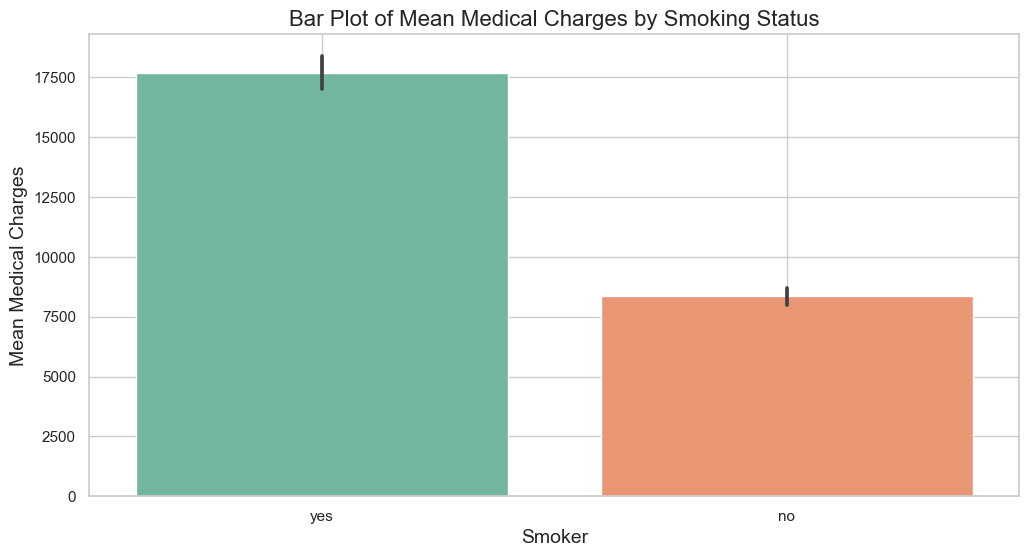

In [34]:
# Bar Plot of Mean Medical Charges by Smoking Status
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'Set2'

# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cleaned_data2, x='Smoker', y='Medical_Charges', palette=palette)
plt.title('Bar Plot of Mean Medical Charges by Smoking Status', fontsize=16)
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Mean Medical Charges', fontsize=14)
plt.grid(True)
plt.show()

**Higher Charges for Smokers**: Individuals who smoke have significantly higher average medical charges compared to non-smokers.

**Magnitude of Difference**: The difference in mean medical charges between smokers and non-smokers is substantial.

**Potential Correlation**: Smoking status is strongly correlated with medical costs.

**Underlying Factors**: Factors related to smoking, such as increased risk of certain diseases, might contribute to the observed difference in medical charges.


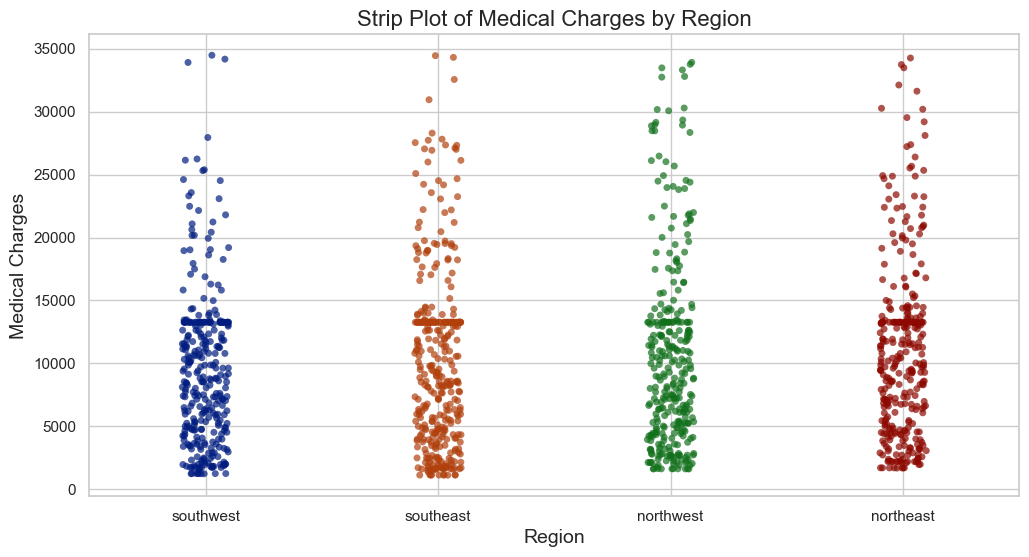

In [38]:
#  Strip Plot of Medical Charges by Region
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'dark'

# Creating the strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=cleaned_data2, x='Region', y='Medical_Charges', palette=palette, jitter=True, alpha=0.7)
plt.title('Strip Plot of Medical Charges by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)
plt.grid(True)
plt.show()

**Distribution Variation**: Medical charges exhibit significant variability across different regions.

**Regional Differences**: The distribution of medical charges is distinct for each region, indicating potential regional factors influencing costs.

**Outliers**: The presence of outliers in all regions suggests the existence of individuals with exceptionally high medical charges.

**Southeastern Trend**: The southeast region appears to have a higher concentration of individuals with medical charges exceeding 30,000.

**Potential Regional Factors**: Factors such as healthcare infrastructure, cost of living, and population health might contribute to the observed regional disparities in medical charges.


### Multivariate Analysis


<Figure size 1200x1000 with 0 Axes>

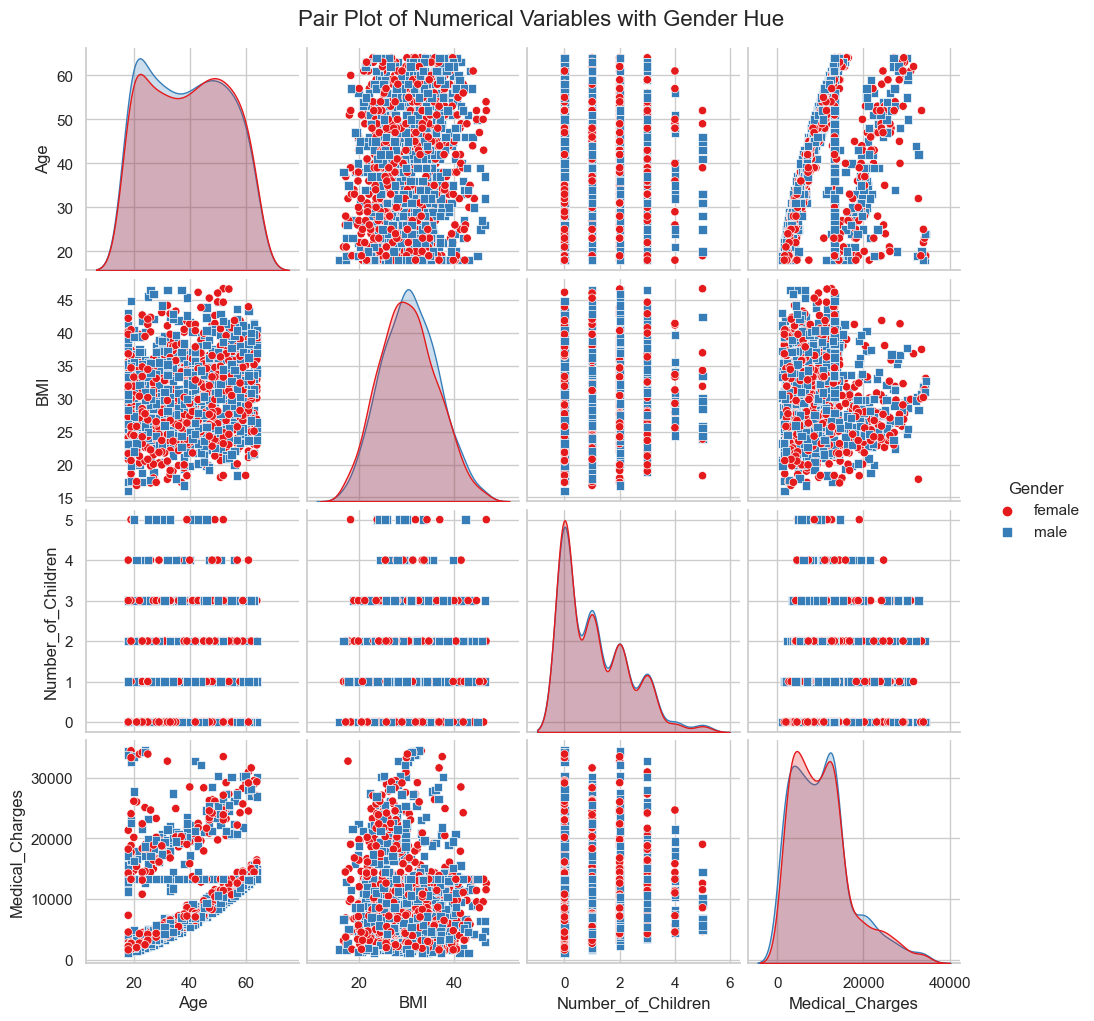

In [41]:
# Gender
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'Set1'

# Creating the pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(data=cleaned_data2, hue='Gender', palette=palette, markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Variables with Gender Hue', y=1.02, fontsize=16)
plt.show()

**Pair Plot Analysis**

**General Observations**
- The dataset includes information on age, BMI, number of children, and medical charges, categorized by gender.
- There appears to be a larger sample size for females compared to males.

**Specific Variable Relationships**
- **Age and Medical Charges**: There is a positive correlation between age and medical charges for both genders, though this correlation is more pronounced in females.
- **BMI and Medical Charges**: A weak positive correlation is suggested between BMI and medical charges, with more scatter observed for males.
- **Number of Children and Medical Charges**: No clear correlation is evident between the number of children and medical charges.
- **Age and BMI**: There seems to be a slight positive correlation between age and BMI, which is more noticeable in females.

**Gender-Based Differences**
- **Medical Charges**: Females tend to have higher medical charges overall, with a wider range compared to males.
- **Age and BMI**: While both genders show a positive correlation between age and BMI, the trend is more pronounced in females.
- **Number of Children**: The distribution of the number of children appears similar between genders, with a higher concentration in the lower child count range.

**Potential Outliers**
- There are potential outliers in medical charges for both genders, indicating unusually high medical costs for certain individuals.


<Figure size 1200x1000 with 0 Axes>

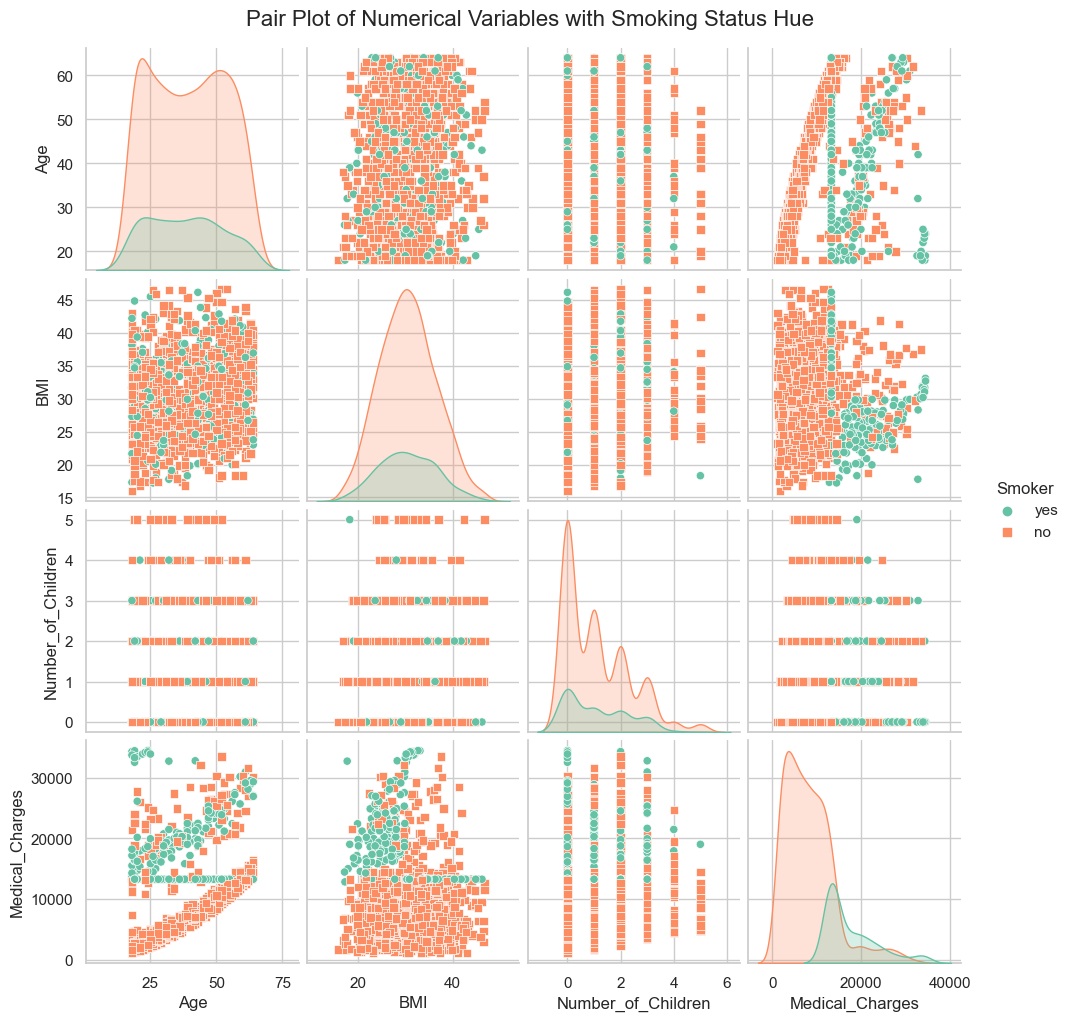

In [42]:
# Smoker
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'Set2'

# Creating the pair plot with hue as Smoker
plt.figure(figsize=(12, 10))
sns.pairplot(data=cleaned_data2, hue='Smoker', palette=palette, markers=["o", "s"])
plt.suptitle('Pair Plot of Numerical Variables with Smoking Status Hue', y=1.02, fontsize=16)
plt.show()

**Inferences from the Pair Plot**

**General Observations**
- The dataset contains information about age, BMI, number of children, and medical charges, categorized by smoker status.
- Smokers tend to have higher medical charges compared to non-smokers.

**Specific Variable Relationships**
- **Age and Medical Charges**: There appears to be a positive correlation between age and medical charges for both smokers and non-smokers, though it's more pronounced in smokers.
- **BMI and Medical Charges**: A weak positive correlation is suggested between BMI and medical charges, with more scatter for smokers.
- **Number of Children and Medical Charges**: No clear correlation is evident between the number of children and medical charges.
- **Age and BMI**: There seems to be a slight positive correlation between age and BMI, more noticeable in smokers.

**Smoking Status Differences**
- **Medical Charges**: Smokers have significantly higher medical charges compared to non-smokers, across all age groups.
- **Age and BMI**: While both groups show a positive correlation between age and BMI, the trend seems more pronounced in smokers.
- **Number of Children**: The distribution of the number of children appears similar between smokers and non-smokers.

**Potential Outliers**
- There are potential outliers in medical charges for both smoker and non-smoker groups, indicating unusually high medical costs for certain individuals.


<Figure size 1200x1000 with 0 Axes>

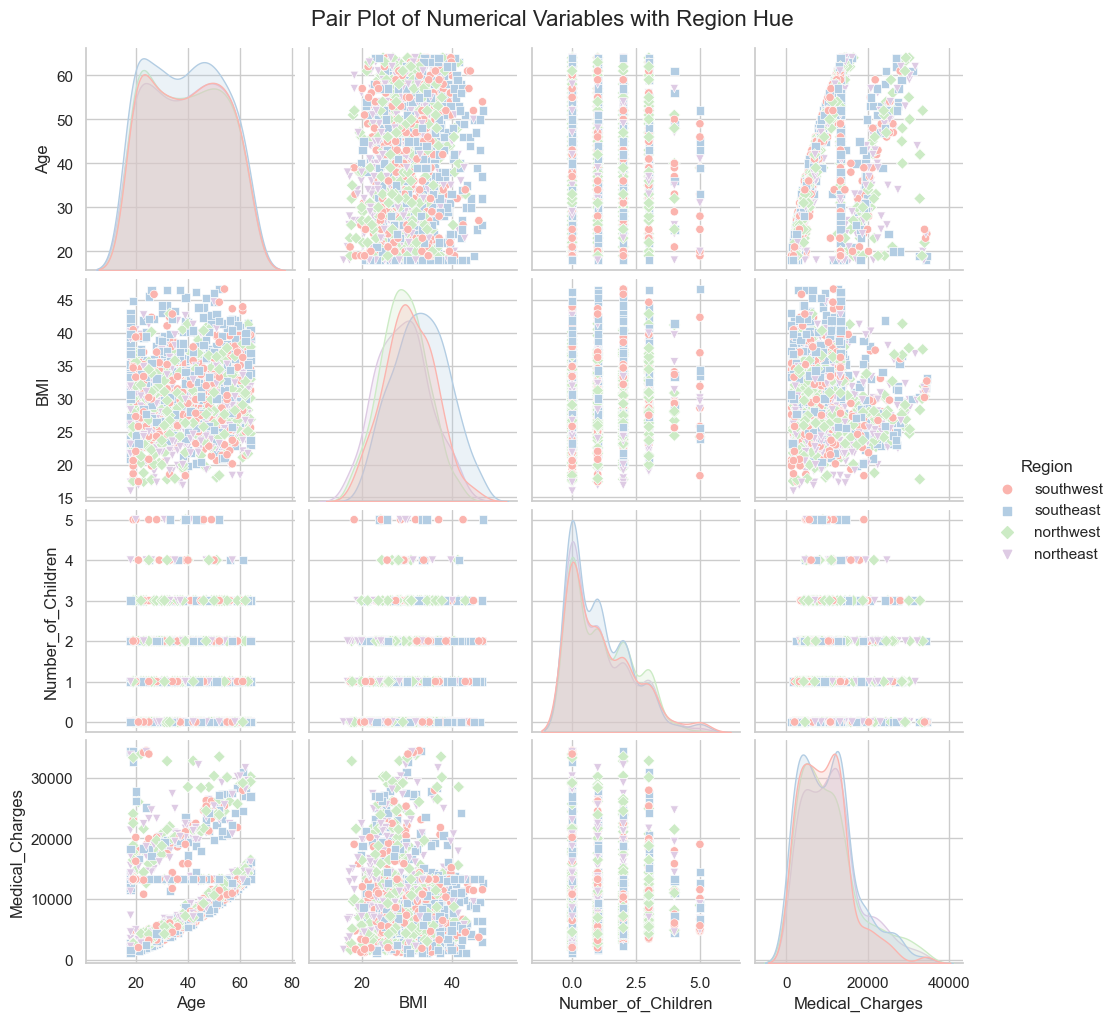

In [43]:
# Region
# Setting the style and color palette for better aesthetics
sns.set(style="whitegrid")
palette = 'Pastel1'

# Creating the pair plot with hue as Region
plt.figure(figsize=(12, 10))
sns.pairplot(data=cleaned_data2, hue='Region', palette=palette, markers=["o", "s", "D", "v"])
plt.suptitle('Pair Plot of Numerical Variables with Region Hue', y=1.02, fontsize=16)
plt.show()

**Inferences from the Pair Plot**

**General Observations**
- The dataset contains information about age, BMI, number of children, and medical charges, categorized by region.
- There are distinct differences in the distribution of these variables across regions.

**Specific Variable Relationships**
- **Age and Medical Charges**: A positive correlation exists between age and medical charges across all regions.
- **BMI and Medical Charges**: A weak positive correlation is suggested between BMI and medical charges, with some variation across regions.
- **Number of Children and Medical Charges**: No clear correlation is evident between the number of children and medical charges.
- **Age and BMI**: A slight positive correlation between age and BMI exists, with some regional variations.

**Regional Differences**
- **Medical Charges**: The distribution of medical charges varies significantly by region, with the southeast region generally having higher charges.
- **Age, BMI, and Number of Children**: While there are some regional differences in the distribution of these variables, they are less pronounced compared to medical charges.

**Potential Outliers**
- Outliers exist in medical charges for all regions, indicating unusually high costs for certain individuals.


In [54]:
# Cross-tabulation between Sex and Smoker
sex_smoker_crosstab = pd.crosstab(cleaned_data2['Gender'], cleaned_data2['Smoker'])
print("Cross-Tabulation between Gender and Smoker:")
sex_smoker_crosstab

Cross-Tabulation between Gender and Smoker:


Smoker,no,yes
Gender,,
female,547,115
male,517,159


### Cross-Tabulation Interpretation: Gender vs. Smoker


#### Interpretation:

1. **General Smoking Trends by Gender:**
   - **Female Smokers:** Out of the 662 females in the dataset, 115 are smokers and 547 are non-smokers. This indicates that approximately 17.4% of females are smokers.
   - **Male Smokers:** Out of the 676 males in the dataset, 159 are smokers and 517 are non-smokers. This indicates that approximately 23.5% of males are smokers.

2. **Comparison of Smoking Rates Between Genders:**
   - The proportion of smokers is higher among males (23.5%) compared to females (17.4%). This suggests that, in this dataset, smoking is more prevalent among males than females.

3. **Non-Smokers Distribution:**
   - Both genders have a high number of non-smokers, but females have a slightly higher number of non-smokers compared to males. This could imply that non-smoking is slightly more common among females in this dataset.

Overall, the cross-tabulation indicates a higher smoking rate among males compared to females, with males having a higher proportion of smokers in the dataset.


In [55]:
# Cross-tabulation between Sex and Region
sex_region_crosstab = pd.crosstab(cleaned_data2['Gender'], cleaned_data2['Region'])
print("\nCross-Tabulation between Gender and Region:")
sex_region_crosstab



Cross-Tabulation between Gender and Region:


Region,northeast,northwest,southeast,southwest
Gender,,,,
female,161,164,175,162
male,163,161,189,163


### Cross-Tabulation Interpretation: Gender vs. Region


#### Interpretation:

1. **Regional Distribution by Gender:**
   - **Females:**
     - **Northeast:** 161 females
     - **Northwest:** 164 females
     - **Southeast:** 175 females
     - **Southwest:** 162 females
   - **Males:**
     - **Northeast:** 163 males
     - **Northwest:** 161 males
     - **Southeast:** 189 males
     - **Southwest:** 163 males

2. **Regional Preferences and Gender Distribution:**
   - **Southeast Region:** Both females and males have the highest counts in the Southeast region, with 175 females and 189 males. This indicates that the Southeast has the largest number of individuals in the dataset, regardless of gender.
   - **Northwest Region:** The Northwest region has the lowest counts for both genders, with 164 females and 161 males, suggesting it is the least represented region in the dataset.
   - **Gender Distribution Across Regions:**
     - Females are fairly evenly distributed across all regions, with a slight peak in the Southeast.
     - Males also show a similar pattern but with a more pronounced peak in the Southeast.

Overall, the data suggests that the Southeast region has the highest representation of both genders, while the Northwest region has the least. The distribution of genders across the regions is relatively balanced, with minor variations in each region.


In [56]:
# Cross-tabulation between Smoker and Region
smoker_region_crosstab = pd.crosstab(cleaned_data2['Smoker'], cleaned_data2['Region'])
print("\nCross-Tabulation between Smoker and Region:")
smoker_region_crosstab



Cross-Tabulation between Smoker and Region:


Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Cross-Tabulation Interpretation: Smoker vs. Region


#### Interpretation:

1. **Smoking Trends by Region:**
   - **Northeast Region:**
     - **Non-Smokers:** 257
     - **Smokers:** 67
   - **Northwest Region:**
     - **Non-Smokers:** 267
     - **Smokers:** 58
   - **Southeast Region:**
     - **Non-Smokers:** 273
     - **Smokers:** 91
   - **Southwest Region:**
     - **Non-Smokers:** 267
     - **Smokers:** 58

2. **Regional Smoking Distribution:**
   - **Southeast Region:** The Southeast region has the highest number of smokers (91), suggesting a higher prevalence of smoking in this region compared to others.
   - **Other Regions:** 
     - The Northeast, Northwest, and Southwest regions have relatively similar counts of smokers, with the Northeast having the highest number of non-smokers and the Northwest and Southwest having the lowest numbers of smokers.
   
3. **Non-Smokers Distribution:**
   - Non-smokers are the most prevalent in all regions, with the Southeast having the highest count (273) and the other regions showing slightly lower counts.

Overall, the Southeast region exhibits the highest number of smokers, while the other regions have relatively similar smoking rates. Non-smokers are predominant across all regions, with the Southeast having the largest non-smoking population.


In [57]:
# Pivot table for Gender with mean of numerical columns
pivot_gender = pd.pivot_table(cleaned_data2, index='Gender', values=['Age', 'BMI', 'Number_of_Children', 'Medical_Charges'], aggfunc='mean')
print("Pivot Table for Gender with Mean of Numerical Columns:")
pivot_gender


Pivot Table for Gender with Mean of Numerical Columns:


,Age,BMI,Medical_Charges,Number_of_Children
Gender,,,,
female,39.503021,30.300726,10339.850157,1.074018
male,38.917160,30.771097,10211.515108,1.115385


### Pivot Table Interpretation: Gender vs. Numerical Variables

#### Interpretation:

1. **Average Age:**
   - **Females:** 39.50 years
   - **Males:** 38.92 years
   - **Insight:** Females are slightly older on average compared to males in the dataset.

2. **Average BMI:**
   - **Females:** 30.30
   - **Males:** 30.77
   - **Insight:** Males have a slightly higher average BMI compared to females. Both genders are in the overweight range according to BMI standards.

3. **Average Medical Charges:**
   - **Females:** \$10,339.85
   - **Males:** \$10,211.52
   - **Insight:** Females have slightly higher average medical charges compared to males, suggesting higher healthcare costs for females in this dataset.

4. **Average Number of Children:**
   - **Females:** 1.07
   - **Males:** 1.12
   - **Insight:** Males have a marginally higher average number of children compared to females, indicating a small difference in the number of dependents.

Overall, the data shows that females have a higher average age and medical charges compared to males, while males have a slightly higher average BMI and number of children. These differences might be relevant for understanding gender-based variations in health metrics and healthcare costs.


In [58]:
# Pivot table for Smoker with mean of numerical columns
pivot_smoker = pd.pivot_table(cleaned_data2, index='Smoker', values=['Age', 'BMI', 'Number_of_Children', 'Medical_Charges'], aggfunc='mean')
print("\nPivot Table for Smoker with Mean of Numerical Columns:")
pivot_smoker



Pivot Table for Smoker with Mean of Numerical Columns:


,Age,BMI,Medical_Charges,Number_of_Children
Smoker,,,,
no,39.385338,30.546806,8369.569283,1.090226
yes,38.514599,30.505623,17674.245620,1.113139


### Pivot Table Interpretation: Smoker vs. Numerical Variables

#### Interpretation:

1. **Average Age:**
   - **Non-Smokers:** 39.39 years
   - **Smokers:** 38.51 years
   - **Insight:** Smokers are slightly younger on average compared to non-smokers.

2. **Average BMI:**
   - **Non-Smokers:** 30.55
   - **Smokers:** 30.51
   - **Insight:** The average BMI is quite similar between smokers and non-smokers, with a negligible difference.

3. **Average Medical Charges:**
   - **Non-Smokers:** \$8,369.57
   - **Smokers:** \$17,674.25
   - **Insight:** Smokers have significantly higher average medical charges compared to non-smokers, suggesting that smoking is associated with higher healthcare costs.

4. **Average Number of Children:**
   - **Non-Smokers:** 1.09
   - **Smokers:** 1.11
   - **Insight:** Smokers have a slightly higher average number of children compared to non-smokers.

Overall, the data indicates that smokers tend to be slightly younger and have higher medical charges compared to non-smokers, with similar BMI and number of children across both groups. The substantial difference in medical charges highlights the potential impact of smoking on healthcare costs.


In [59]:
# Pivot table for Smoker with mean of numerical columns
pivot_smoker = pd.pivot_table(cleaned_data2, index='Smoker', values=['Age', 'BMI', 'Number_of_Children', 'Medical_Charges'], aggfunc='mean')
print("\nPivot Table for Smoker with Mean of Numerical Columns:")
pivot_smoker



Pivot Table for Smoker with Mean of Numerical Columns:


,Age,BMI,Medical_Charges,Number_of_Children
Smoker,,,,
no,39.385338,30.546806,8369.569283,1.090226
yes,38.514599,30.505623,17674.245620,1.113139


### Pivot Table Interpretation: Smoker vs. Numerical Variables

#### Interpretation:

1. **Average Age:**
   - **Non-Smokers:** 39.39 years
   - **Smokers:** 38.51 years
   - **Insight:** Smokers are slightly younger on average compared to non-smokers.

2. **Average BMI:**
   - **Non-Smokers:** 30.55
   - **Smokers:** 30.51
   - **Insight:** There is a negligible difference in average BMI between smokers and non-smokers, indicating similar body weight status.

3. **Average Medical Charges:**
   - **Non-Smokers:** \$8,369.57
   - **Smokers:** \$17,674.25
   - **Insight:** Smokers have significantly higher average medical charges compared to non-smokers, suggesting that smoking is associated with increased healthcare costs.

4. **Average Number of Children:**
   - **Non-Smokers:** 1.09
   - **Smokers:** 1.11
   - **Insight:** Smokers have a slightly higher average number of children compared to non-smokers.

Overall, the analysis shows that while smokers and non-smokers have similar average BMI and number of children, smokers incur much higher medical charges, reflecting the potential health impacts of smoking.
